<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Loading The Data***

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df=pd.read_csv('/content/gdrive/MyDrive/CSE-464(Project)/Copy of Depression and Happiness Factor Analysis.csv')

In [3]:
#df.head()

In [4]:
df.shape

(920, 21)

### ***Feature Extraction for Preparing The Data***

In [5]:
df=df.drop(['Timestamp','Unnamed: 20'],axis=1)
df.shape

(920, 19)

In [6]:
df=df.set_index('Which year are you in?')
#df.head()

In [7]:
df.isnull().sum()

How are you feeling right now?                                                                  0
On a scale of 1-100, how would you express this feeling?                                        0
Gender                                                                                          0
Age                                                                                             0
Your location ?                                                                                 0
Relationship status                                                                             0
Are you happy with your financial state?                                                        0
How much have you succeeded to cope up with the environment of your educational institution?    0
Understanding with your family members?                                                         0
Are you feeling pressure in your study or work right now?                                       0
Are you satisfied wi

In [8]:
#df.head(1)

In [9]:
df.shape

(920, 18)

In [10]:
df_numeric=df.drop(df.iloc[:, [0,2,4,5,6,8,9,10,11,12,13,14,15,16]],axis=1)
#df_numeric.head(1)

In [11]:
df_non_numeric=df.drop(df.iloc[:, [1,3,7,17]],axis=1)
#df_non_numeric.head(1)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
encode=df_non_numeric.apply(le.fit_transform)
#encode.head()

In [14]:
df_final=pd.concat([encode,df_numeric],axis=1)
#df_final.head(3)

In [15]:
df_final.shape

(920, 18)

### ***Feature Selection***

In [16]:
X=df_final.drop('How are you feeling right now?',axis=1)
y=df_final['How are you feeling right now?']

In [17]:
from sklearn.feature_selection import mutual_info_regression

In [18]:
importance=mutual_info_regression(X,y)

In [19]:
feat_imp=pd.Series(importance,df_final.columns[0:len(df_final.columns)-1])

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

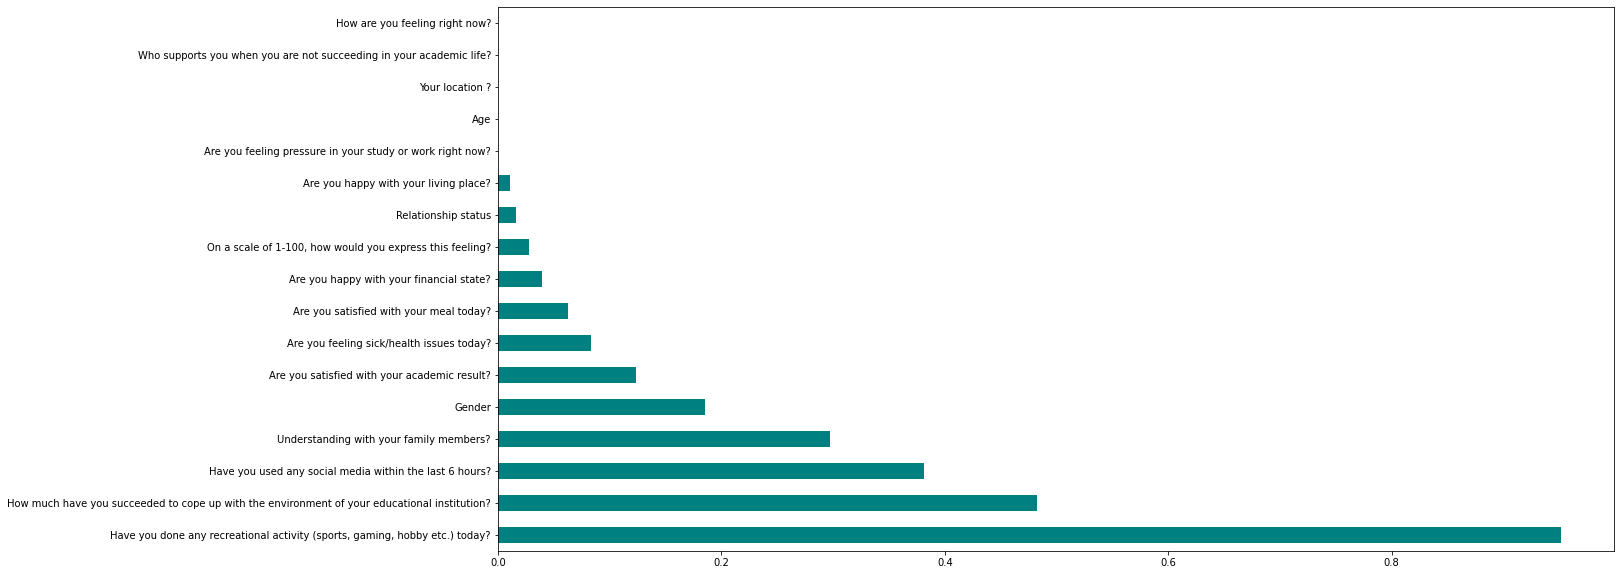

In [21]:
feat_imp.sort_values(ascending=False).plot(kind='barh',color='teal',figsize=(20,10))
plt.show()

In [22]:
from sklearn.feature_selection import SelectPercentile

In [23]:
selection=SelectPercentile(mutual_info_regression,percentile=30)

In [24]:
selection.fit(X,y)

SelectPercentile(percentile=30,
                 score_func=<function mutual_info_regression at 0x7fae89356c80>)

In [25]:
X.columns[selection.get_support()]

Index(['Are you feeling pressure in your study or work right now?',
       'Are you happy with your living place?',
       'Are you satisfied with your meal today?',
       'On a scale of 1-100, how would you express this feeling?',
       'How long did you sleep last night?(in hours)'],
      dtype='object')

### ***Regresson Models***

Here I have used: 

*   Linear Regression (Multiple)
*   Decision Tree Regressor
*   Lasso
*   Ridge
*   Polynominal Regression
*   Random Forest Regressor
*   Logistic Regression



In [26]:
X_new=df_final[['Your location ?','Are you feeling pressure in your study or work right now?','Are you satisfied with your meal today?','On a scale of 1-100, how would you express this feeling?','How long did you sleep last night?(in hours)']]
y_new=df_final[['How are you feeling right now?']]

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold

***Multiple Linear Regression***

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=10)

In [30]:
cv=KFold(n_splits=10,shuffle=True,random_state=10)

In [31]:
lin=LinearRegression()

In [32]:
mse_cv=-cross_val_score(lin,X_train,y_train,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1)

In [33]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred_train=lin.predict(X_train)

In [35]:
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report

In [36]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_train

1.4310469531377132

In [37]:
y_pred_test=lin.predict(X_test)

In [38]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_test

1.5311010333011388

In [39]:
mse_cv.mean()

1.457810893201323

In [40]:
lin.score(X_test,y_test)

0.2108490784562643

In [41]:
accuracy_score(y_test,y_pred_test.round())

0.13043478260869565

In [42]:
print(confusion_matrix(y_test,y_pred_test.round()))

[[ 0 14 17  2  0]
 [ 0  7 20 13  1]
 [ 0 22 16  2  0]
 [ 0 10 20  1  1]
 [ 0  0  3 35  0]]


In [43]:
print(classification_report(y_test,y_pred_test.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.13      0.17      0.15        41
           2       0.21      0.40      0.28        40
           3       0.02      0.03      0.02        32
           4       0.00      0.00      0.00        38

    accuracy                           0.13       184
   macro avg       0.07      0.12      0.09       184
weighted avg       0.08      0.13      0.10       184



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
accuracy_score(y_train,y_pred_train.round())

0.14402173913043478

In [45]:
print(confusion_matrix(y_train,y_pred_train.round()))

[[  0  62  67   4   0]
 [  0  29  76  50   1]
 [  0  61  63  13   1]
 [  1  38  81  10   0]
 [  0   0  13 162   4]]


In [46]:
print(classification_report(y_train,y_pred_train.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.15      0.19      0.17       156
           2       0.21      0.46      0.29       138
           3       0.04      0.08      0.05       130
           4       0.67      0.02      0.04       179

    accuracy                           0.14       736
   macro avg       0.21      0.15      0.11       736
weighted avg       0.24      0.14      0.11       736



***Decision Tree Regressor***

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt_reg=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.17)

In [49]:
cv_r=KFold(n_splits=10,shuffle=True)

In [50]:
cv_mse=-cross_val_score(dt_reg,X_train,y_train,cv=cv_r,scoring='neg_mean_squared_error',n_jobs=-1)

In [51]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.17, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [52]:
y_pred_dt_reg_train=dt_reg.predict(X_train)

In [53]:
train_mse=mean_squared_error(y_train,y_pred_dt_reg_train)
train_mse

0.1368040304006844

In [54]:
y_pred_dt_reg_test=dt_reg.predict(X_test)

In [55]:
test_mse=mean_squared_error(y_test,y_pred_dt_reg_test)
test_mse

0.15248375507914633

In [56]:
cv_mse.mean()

0.12962332947988545

In [57]:
dt_reg.score(X_test,y_test)

0.9214077365086002

In [58]:
accuracy_score(y_test,y_pred_dt_reg_test.round())

0.8260869565217391

In [59]:
print(confusion_matrix(y_test,y_pred_dt_reg_test.round()))

[[32  0  0  1  0]
 [ 0 22 19  0  0]
 [ 0 12 28  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 38]]


In [60]:
print(classification_report(y_test,y_pred_dt_reg_test.round()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.65      0.54      0.59        41
           2       0.60      0.70      0.64        40
           3       0.97      1.00      0.98        32
           4       1.00      1.00      1.00        38

    accuracy                           0.83       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.83      0.83      0.83       184



In [61]:
accuracy_score(y_train,y_pred_dt_reg_train.round())

0.8478260869565217

In [62]:
print(confusion_matrix(y_train,y_pred_dt_reg_train.round()))

[[132   0   0   1   0]
 [  0  89  66   0   1]
 [  2  40  96   0   0]
 [  0   0   0 130   0]
 [  0   1   0   1 177]]


In [63]:
print(classification_report(y_train,y_pred_dt_reg_train.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       133
           1       0.68      0.57      0.62       156
           2       0.59      0.70      0.64       138
           3       0.98      1.00      0.99       130
           4       0.99      0.99      0.99       179

    accuracy                           0.85       736
   macro avg       0.85      0.85      0.85       736
weighted avg       0.85      0.85      0.85       736



***Lasso***

In [64]:
from sklearn.linear_model import Lasso

In [65]:
las=Lasso(alpha=0.4,normalize=True)

In [66]:
cv_lasso=KFold(n_splits=10,shuffle=True)

In [67]:
cv_lasso_mse=-cross_val_score(las,X_train,y_train,scoring='neg_mean_squared_error',cv=cv_lasso,n_jobs=-1)

In [68]:
las.fit(X_train,y_train)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [69]:
y_pred_lasso_train=las.predict(X_train)

In [70]:
mse_lass_train=mean_squared_error(y_train,y_pred_lasso_train)
mse_lass_train

2.0761977197542536

In [71]:
y_pred_lasso_test=las.predict(X_test)

In [72]:
mse_lass_test=mean_squared_error(y_test,y_pred_lasso_test)
mse_lass_test

1.947284085538752

In [73]:
cv_lasso_mse.mean()

2.0845521133542

In [74]:
las.score(X_test,y_test)

-0.0036574969171983

In [75]:
accuracy_score(y_test,y_pred_lasso_test.round())

0.21739130434782608

In [76]:
print(confusion_matrix(y_test,y_pred_lasso_test.round()))

[[ 0  0 33  0  0]
 [ 0  0 41  0  0]
 [ 0  0 40  0  0]
 [ 0  0 32  0  0]
 [ 0  0 38  0  0]]


In [77]:
print(classification_report(y_test,y_pred_lasso_test.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        41
           2       0.22      1.00      0.36        40
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        38

    accuracy                           0.22       184
   macro avg       0.04      0.20      0.07       184
weighted avg       0.05      0.22      0.08       184



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
accuracy_score(y_train,y_pred_lasso_train.round())

0.1875

In [79]:
print(confusion_matrix(y_train,y_pred_lasso_train.round()))

[[  0   0 133   0   0]
 [  0   0 156   0   0]
 [  0   0 138   0   0]
 [  0   0 130   0   0]
 [  0   0 179   0   0]]


In [80]:
print(classification_report(y_train,y_pred_lasso_train.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00       156
           2       0.19      1.00      0.32       138
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00       179

    accuracy                           0.19       736
   macro avg       0.04      0.20      0.06       736
weighted avg       0.04      0.19      0.06       736



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Ridge***

In [81]:
from sklearn.linear_model import Ridge

In [82]:
rid=Ridge(normalize=True)

In [83]:
cv_ridge=KFold(n_splits=10,shuffle=True)

In [84]:
cv_ridge_mse=-cross_val_score(rid,X_train,y_train,cv=cv_ridge,scoring='neg_mean_squared_error',n_jobs=-1)

In [85]:
rid.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [86]:
y_pred_ridge_train=rid.predict(X_train)

In [87]:
mse_ridge_train=mean_squared_error(y_train,y_pred_ridge_train)
mse_ridge_train

1.5756388216723167

In [88]:
y_pred_ridge_test=rid.predict(X_test)

In [89]:
mse_ridge_test=mean_squared_error(y_test,y_pred_ridge_test)
mse_ridge_test

1.5391747278333017

In [90]:
cv_ridge_mse.mean()

1.5919047808304143

In [91]:
rid.score(X_test,y_test)

0.20668778319112968

In [92]:
accuracy_score(y_test,y_pred_ridge_test.round())

0.21739130434782608

In [93]:
print(confusion_matrix(y_test,y_pred_ridge_test.round()))

[[ 0  4 29  0  0]
 [ 0  1 26 14  0]
 [ 0  0 39  1  0]
 [ 0  4 28  0  0]
 [ 0  0  3 35  0]]


In [94]:
print(classification_report(y_test,y_pred_ridge_test.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.11      0.02      0.04        41
           2       0.31      0.97      0.47        40
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        38

    accuracy                           0.22       184
   macro avg       0.08      0.20      0.10       184
weighted avg       0.09      0.22      0.11       184



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
accuracy_score(y_train,y_pred_ridge_train.round())

0.18070652173913043

In [96]:
print(confusion_matrix(y_train,y_pred_ridge_train.round()))

[[  0   7 126   0   0]
 [  0   0 112  44   0]
 [  0   2 133   3   0]
 [  0  21 109   0   0]
 [  0   0  14 165   0]]


In [97]:
print(classification_report(y_train,y_pred_ridge_train.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00       156
           2       0.27      0.96      0.42       138
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00       179

    accuracy                           0.18       736
   macro avg       0.05      0.19      0.08       736
weighted avg       0.05      0.18      0.08       736



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Polynominal Regression***

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [99]:
pol=PolynomialFeatures(degree=3)

In [100]:
X_train_poly=pol.fit_transform(X_train)
X_test_poly=pol.fit_transform(X_test)

In [101]:
pol_reg=LinearRegression()

In [102]:
cv_pol=KFold(n_splits=10,shuffle=True)

In [103]:
mse_cv_pol=-cross_val_score(pol_reg,X_train_poly,y_train,cv=cv_pol,scoring='neg_mean_squared_error',n_jobs=-1)

In [104]:
pol_reg.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_pred_pol_reg_train=pol_reg.predict(X_train_poly)

In [106]:
mse_pol_reg_train=mean_squared_error(y_train,y_pred_pol_reg_train)
mse_pol_reg_train

0.2887972632066498

In [107]:
y_pred_pol_reg_test=pol_reg.predict(X_test_poly)

In [108]:
mse_pol_reg_test=mean_squared_error(y_test,y_pred_pol_reg_test)
mse_pol_reg_test

0.37791992946383857

In [109]:
mse_cv_pol.mean()

0.4540794672202998

In [110]:
pol_reg.score(X_test_poly,y_test)

0.8052147741268787

In [111]:
accuracy_score(y_test,y_pred_pol_reg_test.round())

0.6739130434782609

In [112]:
print(confusion_matrix(y_test,y_pred_pol_reg_test.round()))

[[30  3  0  0  0]
 [ 0 20 18  3  0]
 [ 2 29  8  1  0]
 [ 0  0  2 30  0]
 [ 0  0  1  1 36]]


In [113]:
print(classification_report(y_test,y_pred_pol_reg_test.round()))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.38      0.49      0.43        41
           2       0.28      0.20      0.23        40
           3       0.86      0.94      0.90        32
           4       1.00      0.95      0.97        38

    accuracy                           0.67       184
   macro avg       0.69      0.70      0.69       184
weighted avg       0.67      0.67      0.67       184



In [114]:
accuracy_score(y_train,y_pred_pol_reg_train.round())

0.7364130434782609

In [115]:
print(confusion_matrix(y_train,y_pred_pol_reg_train.round()))

[[121  11   1   0   0]
 [  0  81  70   5   0]
 [  7  75  49   7   0]
 [  0   0   2 124   4]
 [  0   1   4   7 167]]


In [116]:
print(classification_report(y_train,y_pred_pol_reg_train.round()))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       133
           1       0.48      0.52      0.50       156
           2       0.39      0.36      0.37       138
           3       0.87      0.95      0.91       130
           4       0.98      0.93      0.95       179

    accuracy                           0.74       736
   macro avg       0.73      0.73      0.73       736
weighted avg       0.74      0.74      0.74       736



***Random Forest Regressor***

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf_reg=RandomForestRegressor(max_depth=3,oob_score=True,n_jobs=-1,min_samples_leaf=0.1)

In [119]:
cv_rf_reg=KFold(n_splits=10,shuffle=True)

In [120]:
mse_cv_rf_reg=-cross_val_score(rf_reg,X_train,y_train,cv=cv_rf_reg,scoring='neg_mean_squared_error',n_jobs=-1)

In [121]:
rf_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [122]:
y_pred_rf_reg_train=rf_reg.predict(X_train)

In [123]:
mse_rf_reg_train=mean_squared_error(y_train,y_pred_rf_reg_train)
mse_rf_reg_train

0.14405937265422047

In [124]:
y_pred_rf_reg_test=rf_reg.predict(X_test)

In [125]:
mse_rf_reg_test=mean_squared_error(y_test,y_pred_rf_reg_test)
mse_rf_reg_test

0.1251289077308937

In [126]:
mse_cv_rf_reg.mean()

0.15015143398159397

In [127]:
rf_reg.score(X_test,y_test)

0.9355068080421219

In [128]:
accuracy_score(y_test,y_pred_rf_reg_test.round())

0.7771739130434783

In [129]:
print(confusion_matrix(y_test,y_pred_rf_reg_test.round()))

[[32  0  1  0  0]
 [ 0 41  0  0  0]
 [ 0 40  0  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 38]]


In [130]:
print(classification_report(y_test,y_pred_rf_reg_test.round()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.51      1.00      0.67        41
           2       0.00      0.00      0.00        40
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        38

    accuracy                           0.78       184
   macro avg       0.70      0.79      0.73       184
weighted avg       0.67      0.78      0.71       184



In [131]:
accuracy_score(y_train,y_pred_rf_reg_train.round())

0.8070652173913043

In [132]:
print(confusion_matrix(y_train,y_pred_rf_reg_train.round()))

[[132   0   0   1   0]
 [  0 155   0   0   1]
 [  2 136   0   0   0]
 [  0   0   0 130   0]
 [  0   1   0   1 177]]


In [133]:
print(classification_report(y_train,y_pred_rf_reg_train.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       133
           1       0.53      0.99      0.69       156
           2       0.00      0.00      0.00       138
           3       0.98      1.00      0.99       130
           4       0.99      0.99      0.99       179

    accuracy                           0.81       736
   macro avg       0.70      0.79      0.73       736
weighted avg       0.71      0.81      0.74       736



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Logistic Regression***

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
log=LogisticRegression()

In [137]:
cv_log=KFold(n_splits=10,shuffle=True)

In [138]:
mse_cv_log=-cross_val_score(log,X_train,y_train,cv=cv_log,scoring='neg_mean_squared_error',n_jobs=-1)

In [139]:
log.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
y_pred_log_train=log.predict(X_train)

In [141]:
mse_log_train=mean_squared_error(y_train,y_pred_log_train)
mse_log_train

0.6630434782608695

In [142]:
y_pred_log_test=log.predict(X_test)

In [143]:
mse_log_test=mean_squared_error(y_test,y_pred_log_test)
mse_log_test

0.7717391304347826

In [144]:
mse_cv_log.mean()

0.6537023324694557

In [145]:
accuracy_score(y_test,y_pred_log_test.round())

0.8097826086956522

In [146]:
print(confusion_matrix(y_test,y_pred_log_test.round()))

[[31  2  0  0  0]
 [ 0 25  5  0 11]
 [ 1 14 25  0  0]
 [ 0  0  0 32  0]
 [ 0  2  0  0 36]]


In [147]:
print(classification_report(y_test,y_pred_log_test.round()))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.58      0.61      0.60        41
           2       0.83      0.62      0.71        40
           3       1.00      1.00      1.00        32
           4       0.77      0.95      0.85        38

    accuracy                           0.81       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.82      0.81      0.81       184



In [148]:
accuracy_score(y_train,y_pred_log_train.round())

0.8573369565217391

In [149]:
print(confusion_matrix(y_train,y_pred_log_train.round()))

[[127   4   1   1   0]
 [  0 118   8   0  30]
 [  3  36  90   0   9]
 [  0   0   0 130   0]
 [  0  12   0   1 166]]


In [150]:
print(classification_report(y_train,y_pred_log_train.round()))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       133
           1       0.69      0.76      0.72       156
           2       0.91      0.65      0.76       138
           3       0.98      1.00      0.99       130
           4       0.81      0.93      0.86       179

    accuracy                           0.86       736
   macro avg       0.87      0.86      0.86       736
weighted avg       0.87      0.86      0.86       736



### ***Summary***

In [151]:
summary={
    'Algorithm Name':['Multiple Linear Regresson','Decision Tree Regressor','Lasso','Ridge','Polynominal Regression','Random Forest Regressor','Logistic Regression'],
    'Train Accuracy':[0.14,0.85,0.19,0.18,0.74,0.81,0.86],
    'Test Accuracy':[0.13,0.83,0.22,0.22,0.67,0.78,0.81]
}

df_summary=pd.DataFrame(summary,index=['Model:1','Model:2','Model:3','Model:4','Model:5','Model:6','Model:7'])
print("So the summary of my regression analysis is:\n")
print(df_summary)

So the summary of my regression analysis is:

                    Algorithm Name  Train Accuracy  Test Accuracy
Model:1  Multiple Linear Regresson            0.14           0.13
Model:2    Decision Tree Regressor            0.85           0.83
Model:3                      Lasso            0.19           0.22
Model:4                      Ridge            0.18           0.22
Model:5     Polynominal Regression            0.74           0.67
Model:6    Random Forest Regressor            0.81           0.78
Model:7        Logistic Regression            0.86           0.81


So best 3 algorithms are: **Model:2** *>* **Model:7** *>* **Model:6**